In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# normalisation
x_train, x_test = x_train/255., x_test/255.
# 1-hot encoding
y_train, y_test = to_categorical(y_train, dtype='int8'), to_categorical(y_test, dtype='int8')

In [5]:
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inputs)
out = tf.keras.layers.Dense(100,activation='sigmoid')(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(out)
model = tf.keras.Model(inputs, outputs, name="mono_couche_softmax")
#model.summary()

In [6]:
model.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.CategoricalAccuracy(name="acc")],
)

In [8]:
batch_size = 64
history = model.fit(x_train, y_train, batch_size=10, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 289us/sample - loss: 0.2198 - acc: 0.9372
Epoch 2/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.2112 - acc: 0.9397
Epoch 3/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.2033 - acc: 0.9423
Epoch 4/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.1960 - acc: 0.9440
Epoch 5/10
60000/60000 [==============================] - 17s 283us/sample - loss: 0.1890 - acc: 0.9464
Epoch 6/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.1823 - acc: 0.9483
Epoch 7/10
60000/60000 [==============================] - 16s 260us/sample - loss: 0.1763 - acc: 0.9500
Epoch 8/10
60000/60000 [==============================] - 20s 333us/sample - loss: 0.1709 - acc: 0.9515
Epoch 9/10
60000/60000 [==============================] - 17s 281us/sample - loss: 0.1655 - acc: 0.9528
Epoch 10/10
60000/60000 [================

In [15]:
model.predict(x_train[0:1])

array([[1.22010511e-04, 7.48668026e-05, 5.28627599e-04, 1.33033857e-01,
        1.17268954e-07, 8.65609229e-01, 5.09145184e-06, 4.63348842e-04,
        5.89219853e-05, 1.04033599e-04]], dtype=float32)

In [20]:
y_train[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

In [21]:
model.evaluate(x_test,y_test,verbose=2)

10000/10000 - 0s - loss: 0.1615 - acc: 0.9527


[0.1614736468464136, 0.9527]

In [24]:
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inputs)
out = tf.keras.layers.Dense(300,activation='sigmoid')(x)
mid = tf.keras.layers.Dense(100,activation='relu')(out)
outputs = tf.keras.layers.Dense(10, activation="softmax")(mid)
model = tf.keras.Model(inputs, outputs, name="mono_couche_softmax")
#model.summary()
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.CategoricalAccuracy(name="acc")],
)
batch_size = 64
history = model.fit(x_train, y_train, batch_size=10, epochs=10)
model.evaluate(x_test,y_test,verbose=2)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 279us/sample - loss: 0.2689 - acc: 0.9188
Epoch 2/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.1061 - acc: 0.9670
Epoch 3/10
60000/60000 [==============================] - 16s 275us/sample - loss: 0.0679 - acc: 0.9786
Epoch 4/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.0471 - acc: 0.9847
Epoch 5/10
60000/60000 [==============================] - 17s 278us/sample - loss: 0.0357 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 17s 279us/sample - loss: 0.0266 - acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 17s 281us/sample - loss: 0.0203 - acc: 0.9933
Epoch 8/10
60000/60000 [==============================] - 19s 320us/sample - loss: 0.0190 - acc: 0.9936
Epoch 9/10
60000/60000 [==============================] - 17s 283us/sample - loss: 0.0151 - acc: 0.9947
Epoch 10/10
60000/60000 [================

[0.10578790178668859, 0.9772]

In [25]:
model.summary()

Model: "mono_couche_softmax"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.save('my_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model\assets


In [54]:
model.predict(x_train[0:1])

array([[1.9433809e-23, 4.7761046e-13, 2.5989832e-16, 1.1468274e-03,
        1.6228594e-21, 9.9885321e-01, 6.2045368e-21, 1.8963943e-15,
        5.2437831e-17, 3.3209359e-13]], dtype=float32)

In [55]:
pred = model.predict(x_train[0:1])
pred.argmax()

5

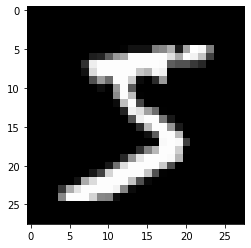

In [60]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [64]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D

In [66]:
model = Sequential(name="conv1")
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "conv1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_5 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               2769024   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [69]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [70]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 44s - loss: 0.1445 - accuracy: 0.9570 - val_loss: 0.0597 - val_accuracy: 0.9798
Epoch 2/10
60000/60000 - 43s - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0604 - val_accuracy: 0.9809
Epoch 3/10
60000/60000 - 43s - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0514 - val_accuracy: 0.9846
Epoch 4/10
60000/60000 - 42s - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0580 - val_accuracy: 0.9820
Epoch 5/10
60000/60000 - 45s - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0641 - val_accuracy: 0.9829
Epoch 6/10
60000/60000 - 48s - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0754 - val_accuracy: 0.9822
Epoch 7/10
60000/60000 - 45s - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0754 - val_accuracy: 0.9827
Epoch 8/10
60000/60000 - 47s - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0636 - val_accuracy: 0.9849
Epoch 9/10
60000/60000 - 49s - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0776 - val_accuracy: 0.9824
Epoch

In [71]:
model.evaluate(x_test,y_test,verbose=2)

10000/10000 - 3s - loss: 0.0647 - accuracy: 0.9856


[0.06474957247209229, 0.9856]

In [76]:
model.predict(x_train[0:1])

array([[6.0827373e-19, 1.1120219e-17, 3.4048902e-19, 1.0799486e-04,
        4.1091457e-21, 9.9989200e-01, 1.6473605e-16, 2.2622993e-16,
        5.8350392e-14, 1.2923922e-08]], dtype=float32)

In [74]:
model.save('conv_model')

INFO:tensorflow:Assets written to: conv_model\assets
